Here, we are going to use historical data of patients, and their response to different medications. Then we will use the trained decision tree to predict the class of an unknown patient, or to find a proper drug for a new patient.

In [1]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import sys
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

The Dataset used here is from medical research study about a set of 200 patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y. 
    Part of our job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The features of this dataset are Age, Sex, Blood Pressure, and the Cholesterol of the patients, and the target is the drug that each patient responded to and then use it to predict the class of an unknown patient, or to prescribe a drug to a new patient.

In [6]:
#Downloading the Data
my_data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv', delimiter=",")
my_data.head(11)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY


In [8]:
my_data.shape

(200, 6)

### Pre-processing

<div href="pre-processing">
    <h2>Pre-processing</h2>
</div>


Using <b>my_data</b> as the Drug.csv data read by pandas, declare the following variables: <br>

<ul>
    <li> <b> X </b> as the <b> Feature Matrix </b> (data of my_data) </li>
    <li> <b> y </b> as the <b> response vector </b> (target) </li>
</ul>


In [44]:
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]



array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

### Setting up the Decision Tree

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
y = my_data["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

In [47]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [48]:
X_trainset.shape

(140, 5)

In [49]:
y_trainset.shape

(140,)

In [50]:
print('Shape of X training set {}'.format(X_trainset.shape),'&',' Size of Y training set {}'.format(y_trainset.shape))

Shape of X training set (140, 5) &  Size of Y training set (140,)


In [51]:
print('Shape of X training set {}'.format(X_testset.shape),'&',' Size of Y training set {}'.format(y_testset.shape))

Shape of X training set (60, 5) &  Size of Y training set (60,)


In [52]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [53]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

 
### Prediction

In [56]:
predTree = drugTree.predict(X_testset)

In [57]:
print (predTree [0:5])
print (y_testset [0:5])


['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


# Evaluation

In [59]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9833333333333333


### Visualization

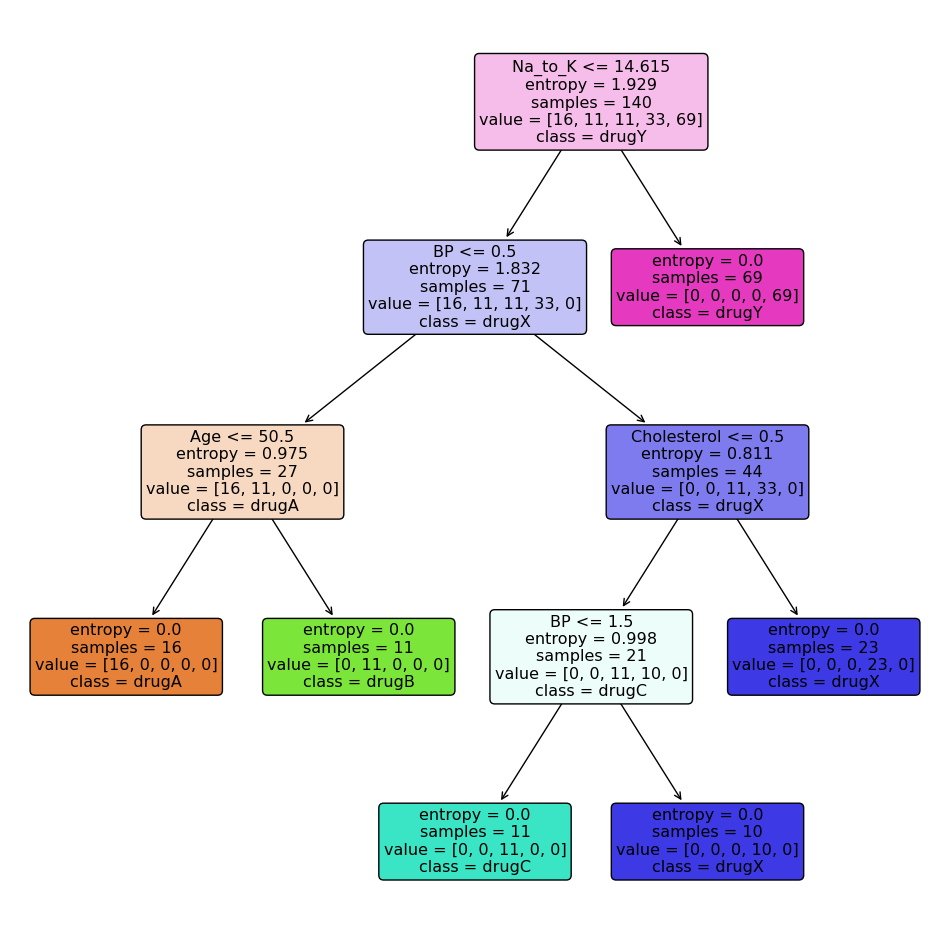

In [61]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming 'drugTree' is your trained decision tree model
# Plot the decision tree
plt.figure(figsize=(12,12))  # Set the size of the figure
plot_tree(drugTree, 
          feature_names=['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'], 
          class_names=drugTree.classes_, 
          filled=True, 
          rounded=True)
plt.show()


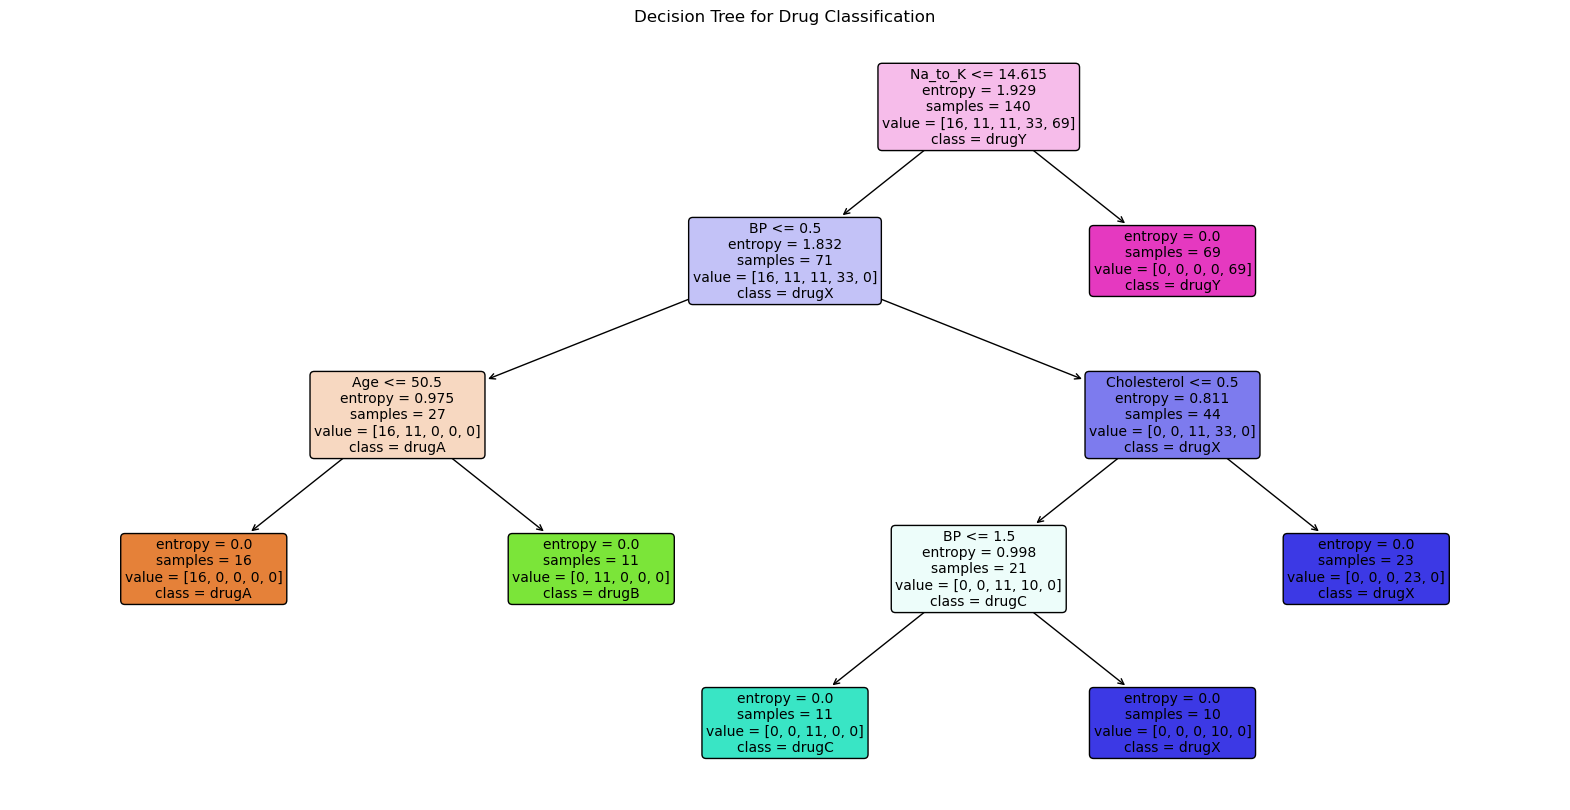

In [62]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming 'drugTree' is your trained decision tree model
# Plot the decision tree with detailed node labels
plt.figure(figsize=(20,10))  # Set the size of the figure for better visibility
plot_tree(drugTree, 
          feature_names=['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'], 
          class_names=drugTree.classes_, 
          filled=True, 
          rounded=True,
          impurity=True,  # Show impurity at each node
          fontsize=10)    # Set font size for readability

# Add title and axis labels for more context
plt.title('Decision Tree for Drug Classification')
plt.xlabel('Node Depth')
plt.ylabel('Samples per Node')

# Display the plot
plt.show()


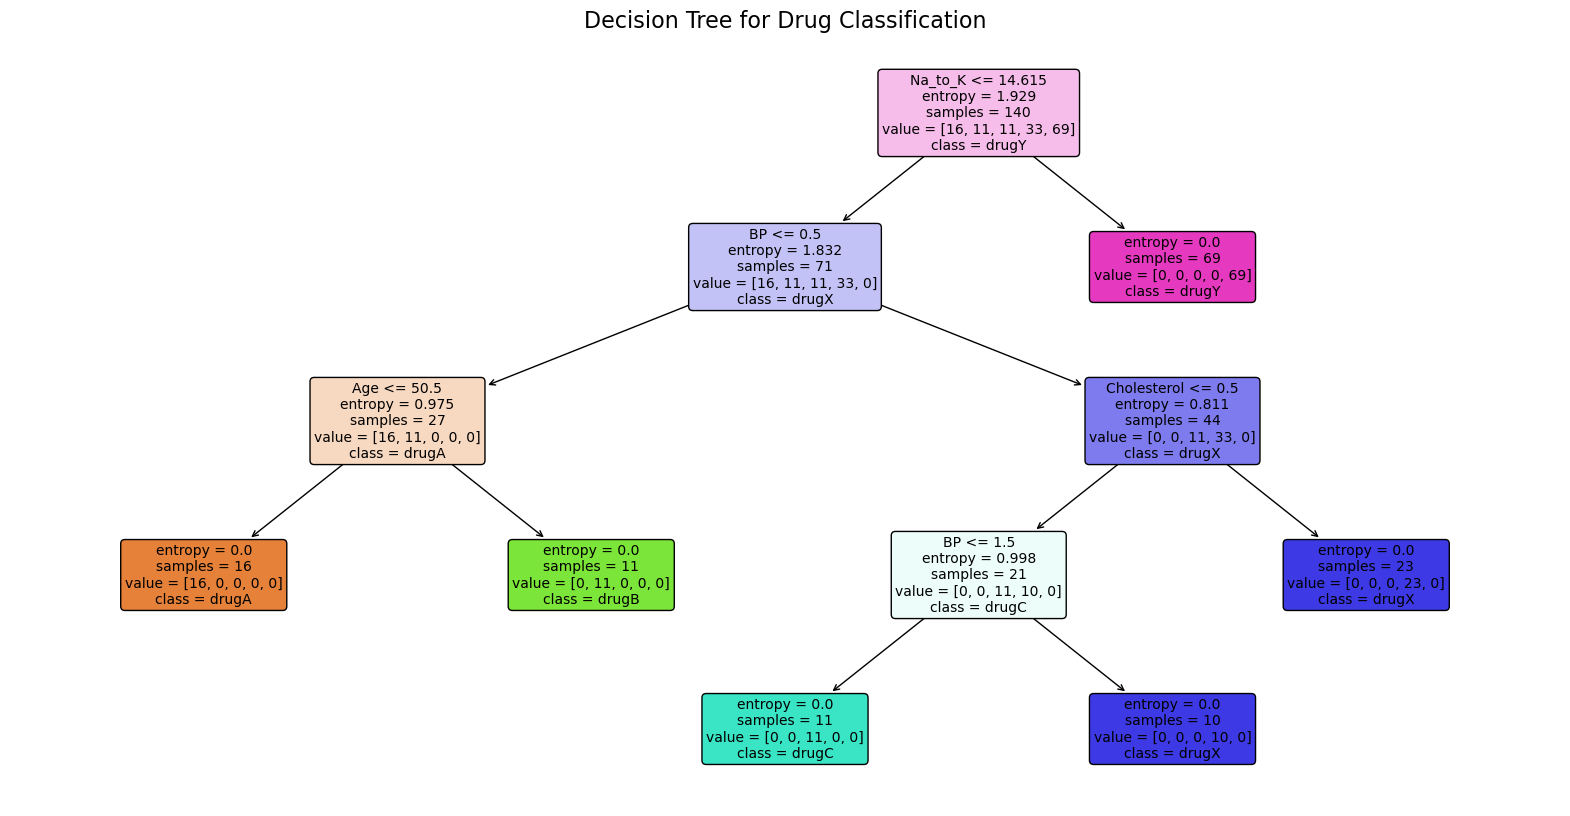

In [63]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming 'drugTree' is your trained decision tree model
plt.figure(figsize=(20, 10))  # Set the size of the figure for better visibility
plot_tree(drugTree, 
          feature_names=['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'], 
          class_names=drugTree.classes_, 
          filled=True, 
          rounded=True,
          impurity=True,  # Show impurity at each node
          fontsize=10)    # Set font size for readability

# Add title and axis labels for more context
plt.title('Decision Tree for Drug Classification', fontsize=16)
plt.xlabel('Node Depth', fontsize=12)
plt.ylabel('Samples per Node', fontsize=12)

# Save the plot as an image
plt.savefig('decision_tree.png')

# Display the plot
plt.show()


In [67]:
!pip install dash
!pip install dash-bootstrap-components


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 7.9 MB/s eta 0:00:00


In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import joblib

# Load the dataset
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv')

# Encode categorical variables
le_sex = LabelEncoder()
df['Sex'] = le_sex.fit_transform(df['Sex'])

# Define features and target variable
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
y = df['Drug'].values

# Encode BP and Cholesterol
le_BP = LabelEncoder()
le_Chol = LabelEncoder()
X[:, 2] = le_BP.fit_transform(X[:, 2])
X[:, 3] = le_Chol.fit_transform(X[:, 3])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree model
drugTree = DecisionTreeClassifier(criterion='entropy', max_depth=4)
drugTree.fit(X_train, y_train)

# Save the model
joblib.dump(drugTree, 'drugTree_model.pkl')

print("Model saved successfully.")


Model saved successfully.


FileNotFoundError: [Errno 2] No such file or directory: '/home/wsuser/work/assets/decision_tree.png'

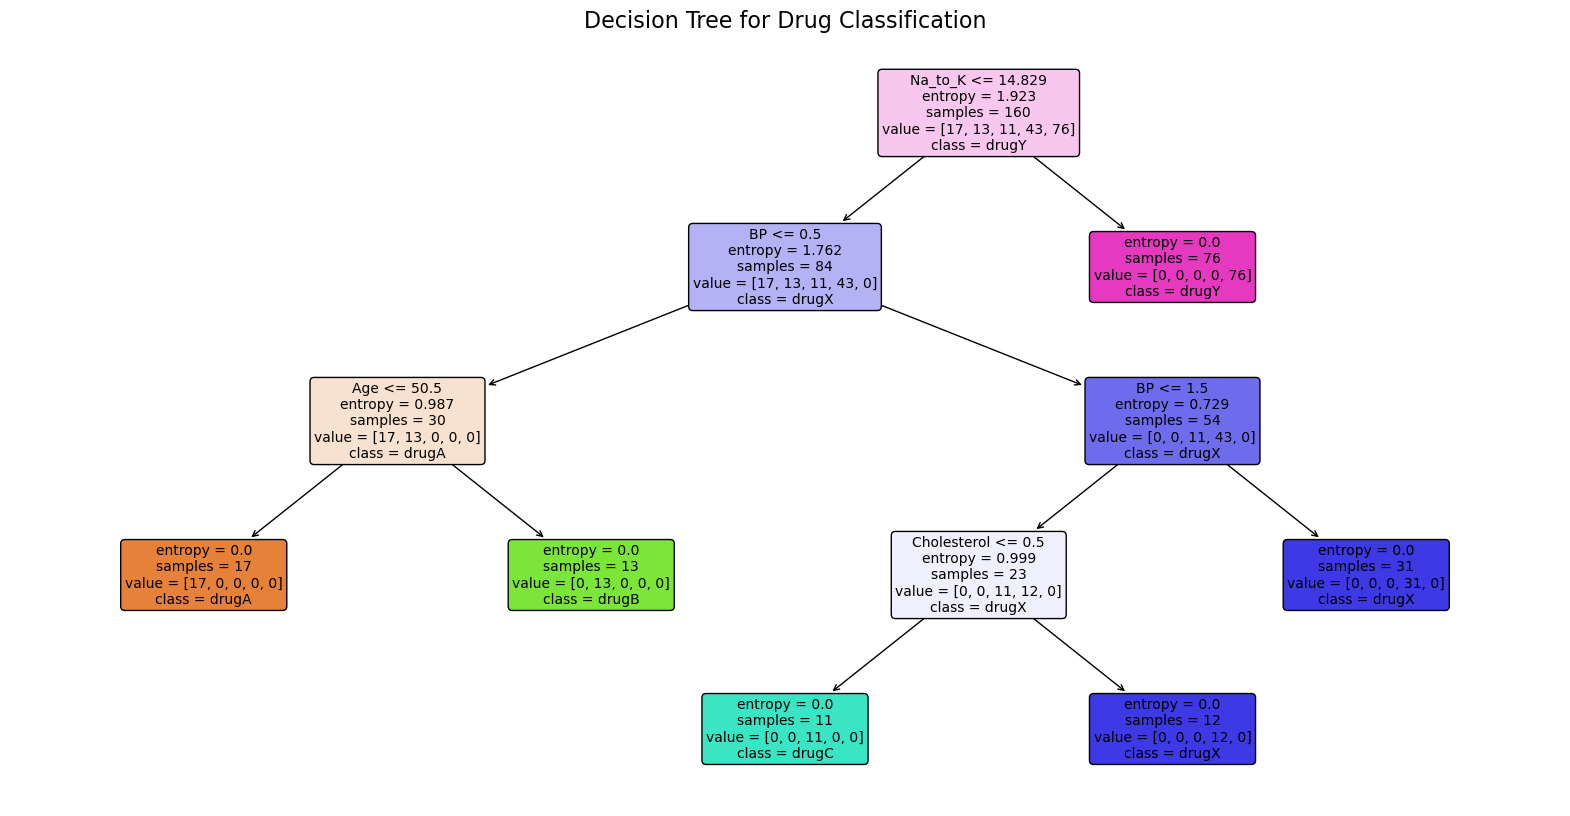

In [74]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import joblib

# Load the trained decision tree model
drugTree = joblib.load('drugTree_model.pkl')

# Plot the decision tree
plt.figure(figsize=(20, 10))  # Set the size of the figure for better visibility
plot_tree(drugTree, 
          feature_names=['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'], 
          class_names=drugTree.classes_, 
          filled=True, 
          rounded=True,
          impurity=True,  # Show impurity at each node
          fontsize=10)    # Set font size for readability

# Add title and axis labels for more context
plt.title('Decision Tree for Drug Classification', fontsize=16)
plt.xlabel('Node Depth', fontsize=12)
plt.ylabel('Samples per Node', fontsize=12)

# Save the plot as an image in the 'assets' directory
plt.savefig('assets/decision_tree.png')

# Display the plot
plt.show()


In [71]:
from sklearn import metrics
import matplotlib.pyplot as plt
accuracy=metrics.accuracy_score(y_testset, predTree)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree)

SyntaxError: incomplete input (3518843013.py, line 4)

In [75]:
import dash
from dash import dcc, html, Input, Output
import dash_bootstrap_components as dbc
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import joblib

# Load the decision tree model
drugTree = joblib.load('drugTree_model.pkl')

# Load sample data (assuming it's saved in a CSV file)
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv')

# Encode categorical variables (similar to the preprocessing step)
from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()
df['Sex'] = le_sex.fit_transform(df['Sex'])

le_BP = LabelEncoder()
le_Chol = LabelEncoder()
df['BP'] = le_BP.fit_transform(df['BP'])
df['Cholesterol'] = le_Chol.fit_transform(df['Cholesterol'])

# Initialize the Dash app
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

app.layout = dbc.Container([
    dbc.Row([
        dbc.Col(html.H1("Drug Recommendation Dashboard"), className="mb-4")
    ]),
    dbc.Row([
        dbc.Col([
            html.Img(src='assets/decision_tree.png', style={'width': '100%'})
        ], width=6),
        dbc.Col([
            dbc.Form([
                dbc.Row([
                    dbc.Label("Age", width=2),
                    dbc.Col(dbc.Input(id='input-age', type='number', value=50), width=10)
                ], className="mb-3"),
                dbc.Row([
                    dbc.Label("Sex", width=2),
                    dbc.Col(
                        dbc.RadioItems(
                            options=[
                                {'label': 'Male', 'value': 1},
                                {'label': 'Female', 'value': 0}
                            ],
                            value=1,
                            id='input-sex',
                            inline=True
                        ),
                        width=10
                    )
                ], className="mb-3"),
                dbc.Row([
                    dbc.Label("BP", width=2),
                    dbc.Col(
                        dbc.RadioItems(
                            options=[
                                {'label': 'HIGH', 'value': le_BP.transform(['HIGH'])[0]},
                                {'label': 'NORMAL', 'value': le_BP.transform(['NORMAL'])[0]},
                                {'label': 'LOW', 'value': le_BP.transform(['LOW'])[0]},
                            ],
                            value=le_BP.transform(['NORMAL'])[0],
                            id='input-bp',
                            inline=True
                        ),
                        width=10
                    )
                ], className="mb-3"),
                dbc.Row([
                    dbc.Label("Cholesterol", width=2),
                    dbc.Col(
                        dbc.RadioItems(
                            options=[
                                {'label': 'HIGH', 'value': le_Chol.transform(['HIGH'])[0]},
                                {'label': 'NORMAL', 'value': le_Chol.transform(['NORMAL'])[0]},
                            ],
                            value=le_Chol.transform(['NORMAL'])[0],
                            id='input-cholesterol',
                            inline=True
                        ),
                        width=10
                    )
                ], className="mb-3"),
                dbc.Row([
                    dbc.Label("Na to K ratio", width=2),
                    dbc.Col(dbc.Input(id='input-natok', type='number', value=15.0), width=10)
                ], className="mb-3"),
                dbc.Button("Predict", id='predict-button', color='primary')
            ])
        ], width=6),
    ]),
    dbc.Row([
        dbc.Col(html.H3(id='prediction-output'), className="mt-4")
    ])
])

@app.callback(
    Output('prediction-output', 'children'),
    [Input('predict-button', 'n_clicks')],
    [Input('input-age', 'value'),
     Input('input-sex', 'value'),
     Input('input-bp', 'value'),
     Input('input-cholesterol', 'value'),
     Input('input-natok', 'value')]
)
def update_prediction(n_clicks, age, sex, bp, cholesterol, natok):
    if n_clicks is None:
        return ""
    
    # Prepare the input data for prediction
    input_data = [[age, sex, bp, cholesterol, natok]]
    
    # Predict the class
    prediction = drugTree.predict(input_data)[0]
    
    return f"The recommended drug for the patient is: {prediction},\nwith the accuracy of  {100*accuracy}"
    

if __name__ == '__main__':
    app.run_server(debug=True)

In [76]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9833333333333333
